In [1]:
from Phonemes import Phonemes
from utils import seed_everything

seed_everything()
P = Phonemes()

Using MPS device
Testing epoch 1_1...
Testing epoch 30...


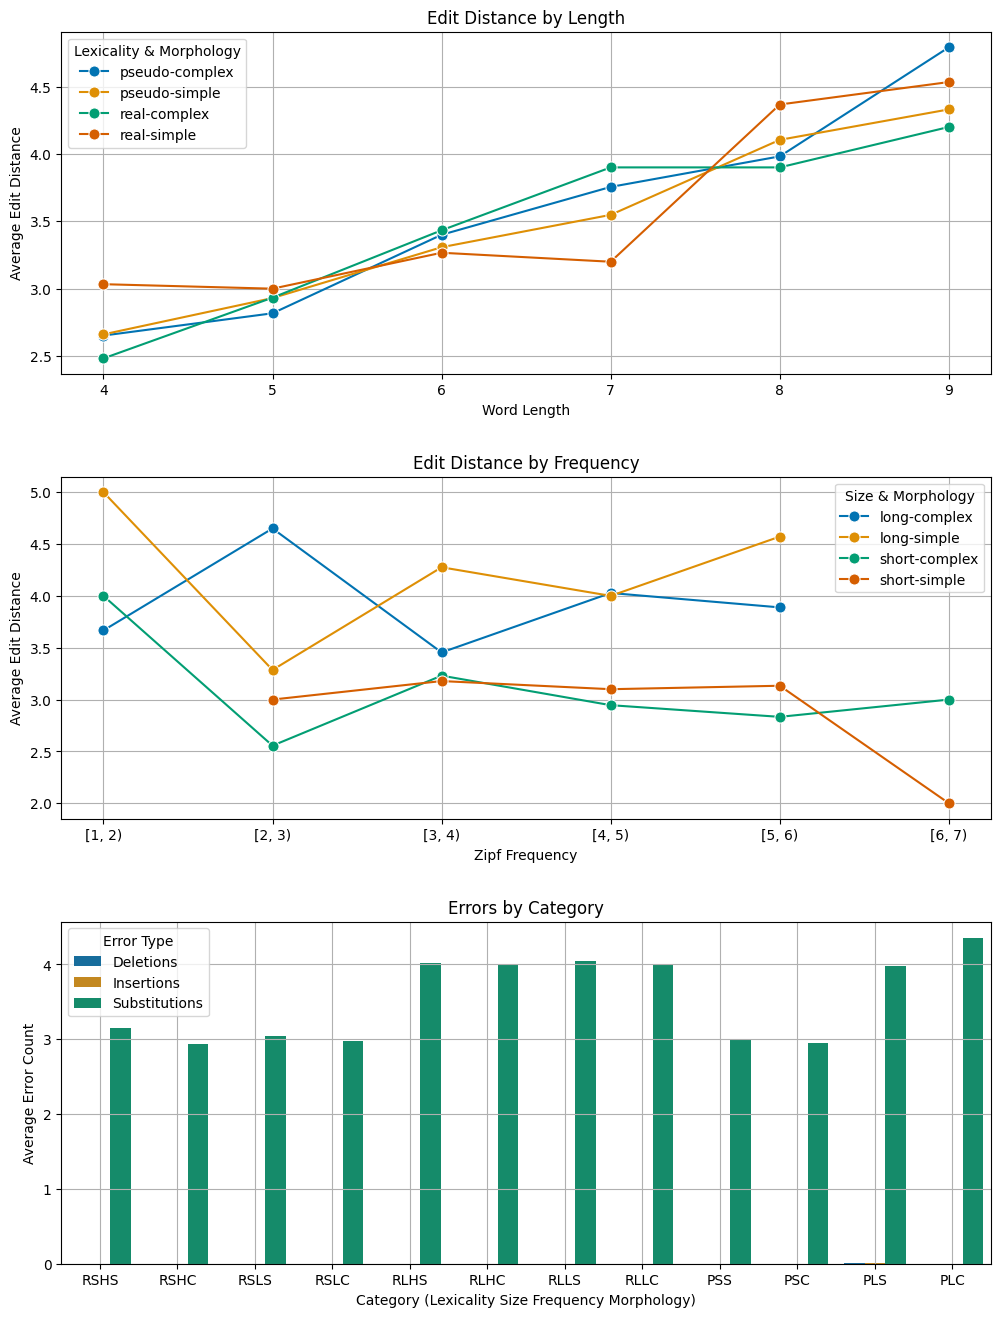

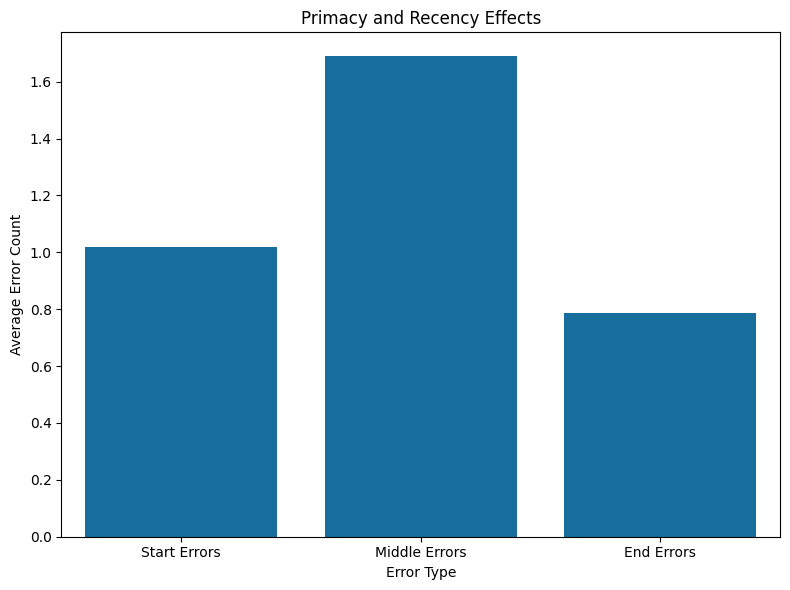

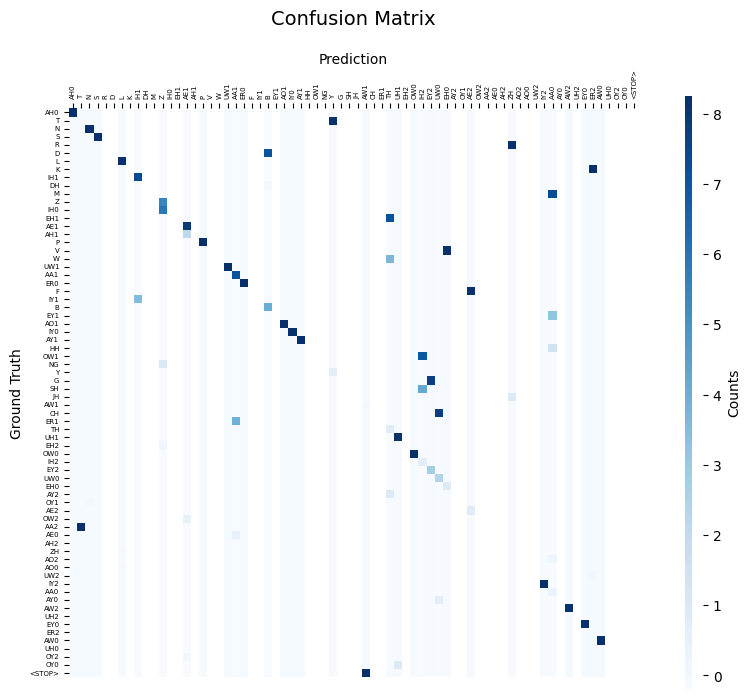

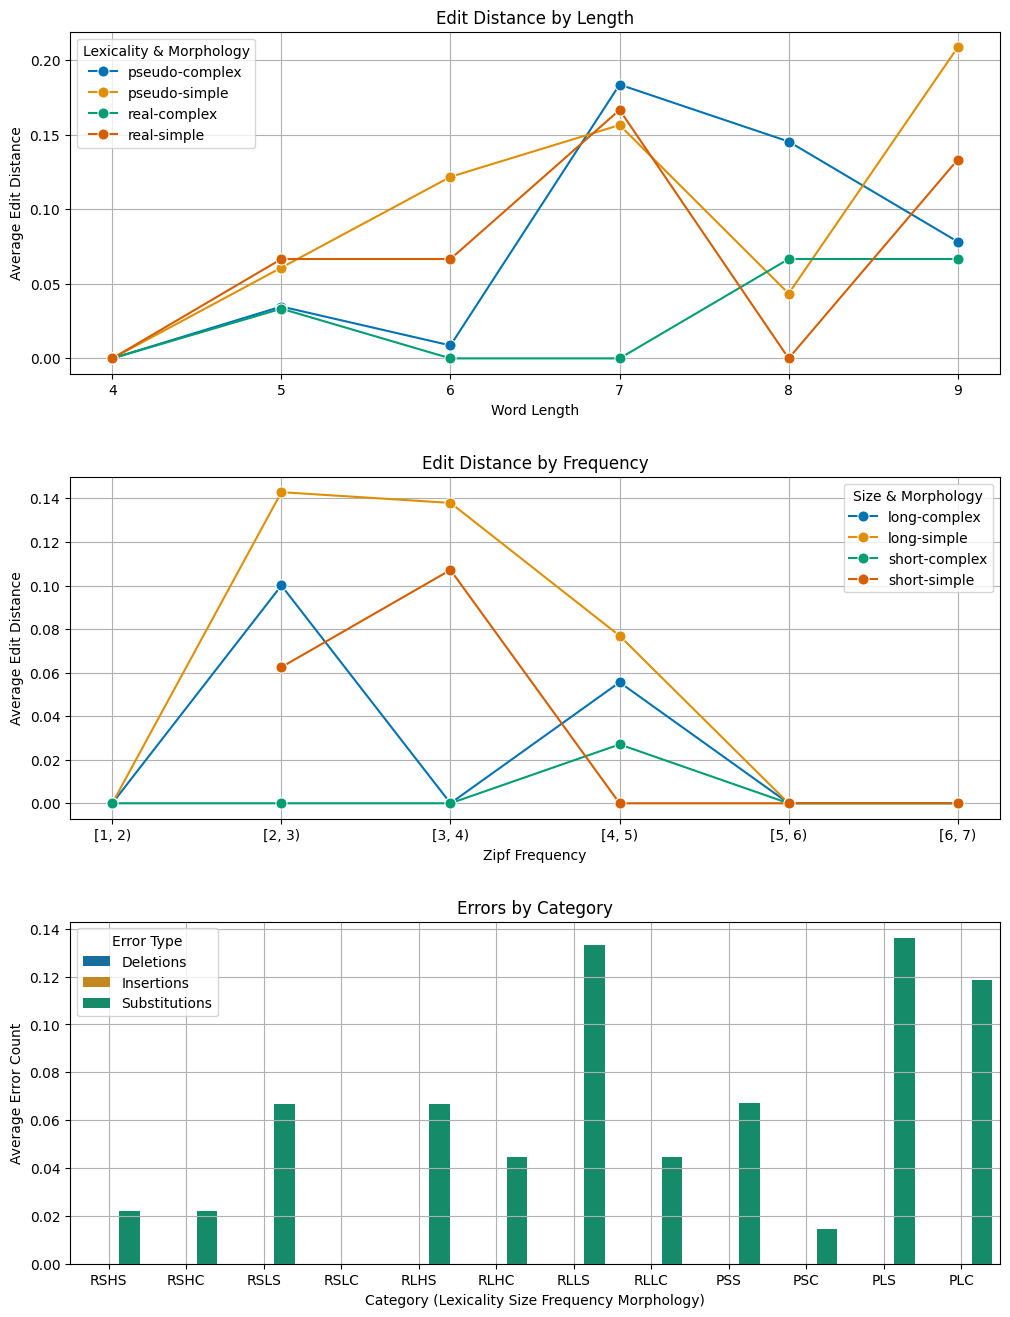

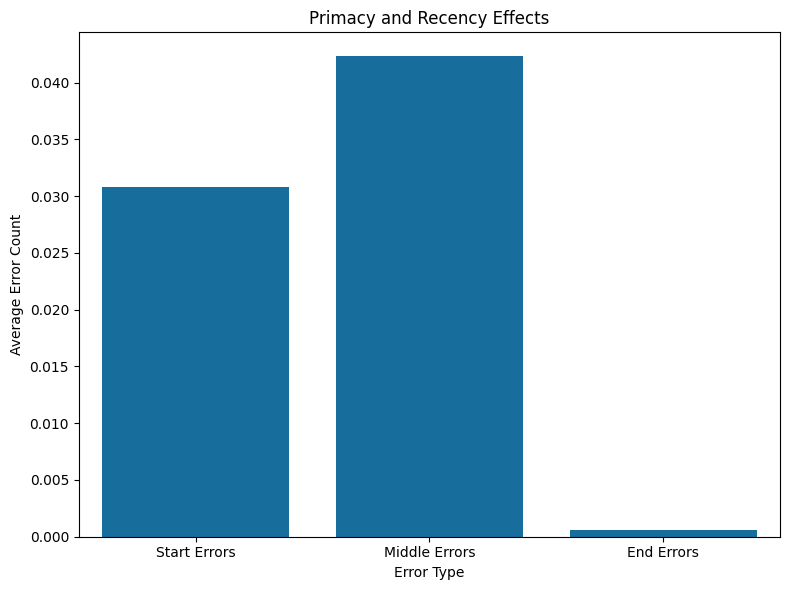

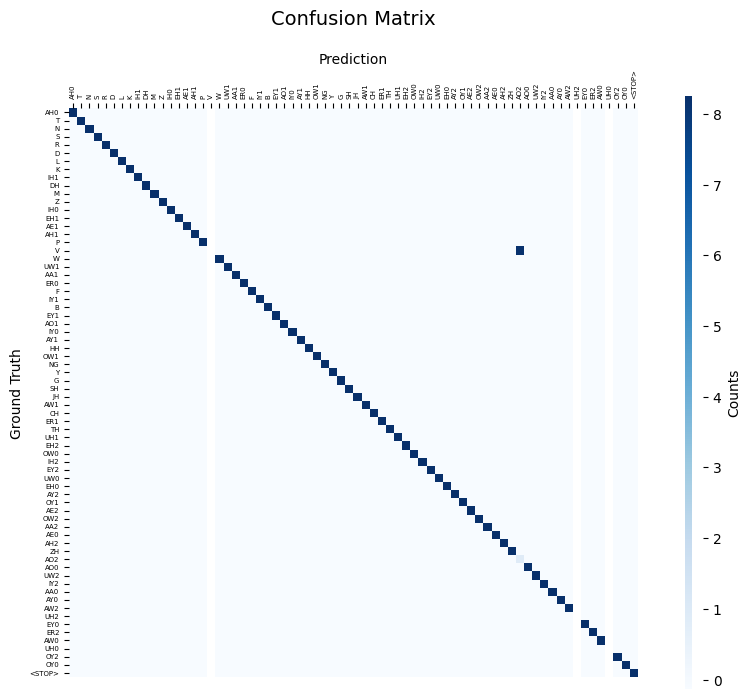

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 2000)
from test_repetition import test_repetition

# model = "e30_h2_l2_d0.2_r0.005"
# model = "e30_h4_l1_d0.2_r0.01"
# model = "e30_h4_l1_d0.0_r0.001"
model = "e30_h8_l1_d0.0_r0.001"
dfs = test_repetition(P, model)

In [3]:
dfs[1]

,Word,Size,Length,Frequency,Zipf Frequency,Morphology,Lexicality,Part of Speech,Phonemes,Prediction,Deletions,Insertions,Substitutions,Edit Distance,Start Errors,Middle Errors,End Errors
0,bathmat,long,7,low,1.55,complex,real,NOUN,"[B, AE1, TH, M, AH0, T]","[B, AE1, TH, M, AH0, T]",0,0,0,0,0,0,0
1,decoder,long,7,low,2.84,complex,real,NOUN,"[D, IH0, K, OW1, D, ER0]","[D, IH0, K, OW1, D, ER0]",0,0,0,0,0,0,0
2,defiant,long,7,low,3.21,complex,real,ADJ,"[D, IH0, F, AY1, AH0, N, T]","[D, IH0, F, AY1, AH0, N, T]",0,0,0,0,0,0,0
3,padlock,long,7,low,2.68,complex,real,NOUN,"[P, AE1, D, L, AA2, K]","[P, AE1, D, L, AA2, K]",0,0,0,0,0,0,0
4,immoral,long,7,low,3.46,complex,real,ADJ,"[IH0, M, AO1, R, AH0, L]","[IH0, M, AO1, R, AH0, L]",0,0,0,0,0,0,0
5,nonstop,long,7,low,3.37,complex,real,ADJ,"[N, AA2, N, S, T, AA1, P]","[N, AA2, N, S, T, AA1, P]",0,0,0,0,0,0,0
6,parasol,long,7,low,2.63,complex,real,NOUN,"[P, EH1, R, AH0, S, AO2, L]","[P, EH1, R, AH0, S, AO2, L]",0,0,0,0,0,0,0
7,reactor,long,7,low,3.83,complex,real,VERB,"[R, IY0, AE1, K, T, ER0]","[R, IY0, AE1, K, T, ER0]",0,0,0,0,0,0,0
8,recycle,long,7,low,3.35,complex,real,VERB,"[R, IY0, S, AY1, K, AH0, L]","[R, IY0, S, AY1, K, AH0, L]",0,0,0,0,0,0,0
9,reenact,long,7,low,2.42,complex,real,VERB,"[R, IY0, IH0, N, AE1, K, T]","[R, IY0, IH0, N, AE1, K, T]",0,0,0,0,0,0,0


In [ ]:
from train_repetition import train_repetition

params = {
    'n_epochs': 10,
    'h_size': 4,
    'n_layers': 2,
    'dropout': 0.1,
    'l_rate': 0.001
}

train_repetition(P, params)

Using MPS device
Testing epoch 1_1...
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


ValueError: The condensed distance matrix must contain only finite values.

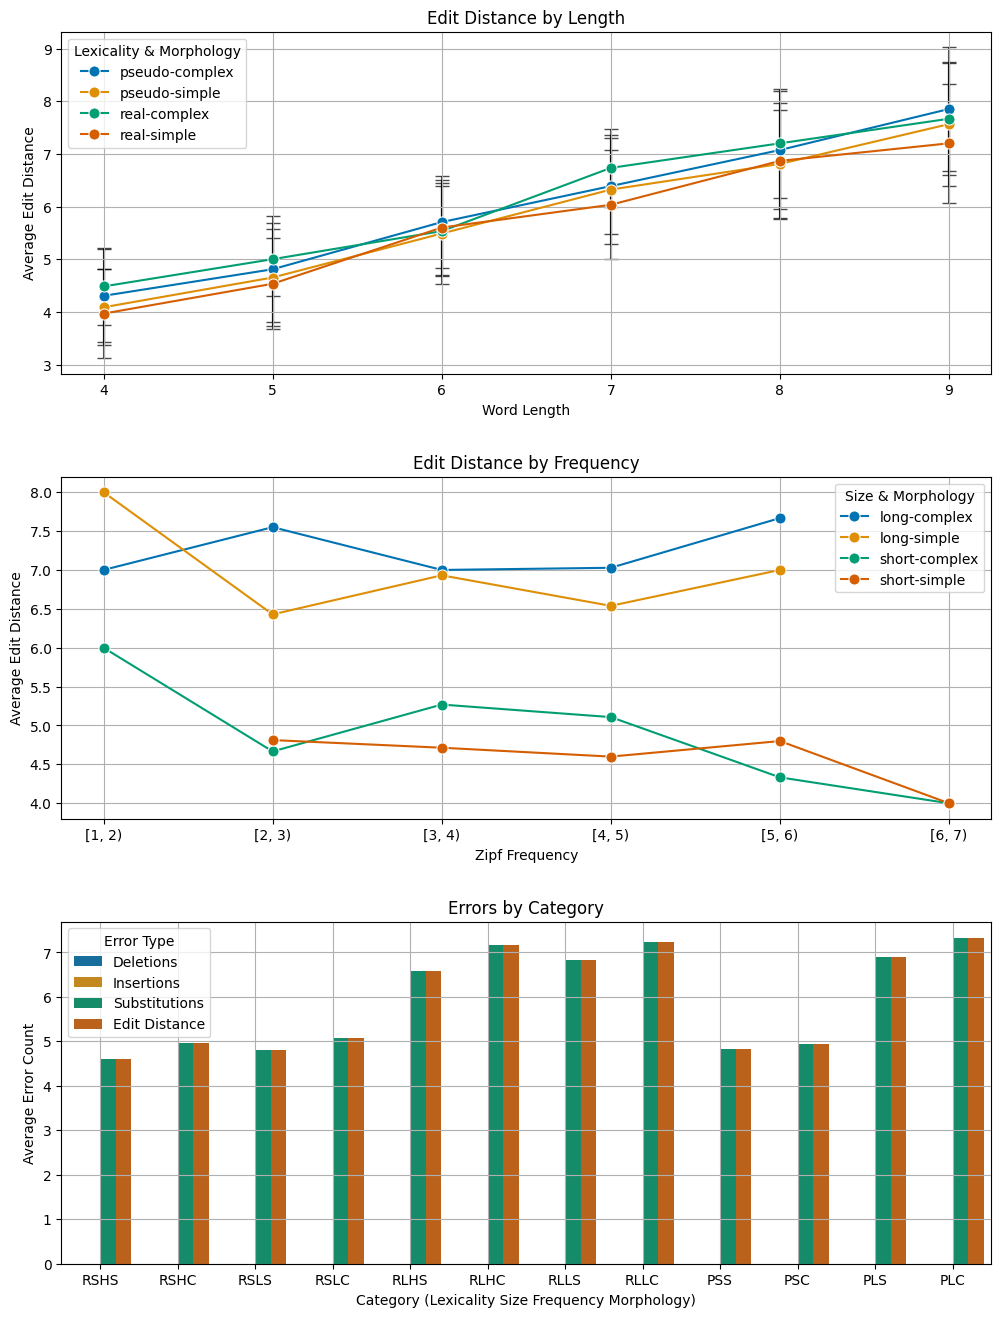

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 2000)
# sort test data by Zipf frequency
P.test_data.sort_values(by='Zipf Frequency', inplace=True)
P.test_data

In [ ]:
import pandas as pd
from pathlib import Path

# Define the column names
columns = ['hidden_size', 'num_layers', 'dropout', 'learning_rate']
columns += [f'{loss_type}{1}-{i}' for i in range(1, 10) for loss_type in ['T', 'V']]
columns += [f'{loss_type}{i}' for i in range(2, 31) for loss_type in ['T', 'V']]

# Create the empty DataFrame
df = pd.DataFrame(columns=columns)

# Fill the DataFrame with sample hyperparameters and losses
df.loc['steve'] = [4, 2, 0.1, 0.001] + [0.0001] * 76
df.loc['john'] = [4, 2, 0.1, 0.001] + [0.0002] * 76
df.loc['david'] = [4, 2, 0.1, 0.001] + [0.0003] * 76

df
# # Establish path to data directory
# FILE_DIR = Path(__file__).resolve()
# DATA_DIR = FILE_DIR.parent.parent.parent / "data"
# DATA_DIR.mkdir(exist_ok=True)

# # Save the DataFrame to a CSV file
# df.to_csv(DATA_DIR / "grid_search.csv", index=False)

In [ ]:
from train_repetition import grid_search_log

model = "e30_h8_l1_d0.0_r0.001"

train_losses = [0.0001] * 30
val_losses = [0.0002] * 30

grid_search_log(train_losses, val_losses, model)

In [ ]:
# read grid_search.csv
import pandas as pd
df = pd.read_csv("grid_search.csv")
df